In [2]:
# Edit this cell to print out your name.
print "My name is %s" % ("Carmelo Emmanuele")

My name is Carmelo Emmanuele


# Predicting the weather

***For all of the questions in this project, assume that 1 month = 30 days.***

## Problem 1 (20 pts)

Suppose there is a 20% chance it will rain on any given day in a month. What are the odds that that rains on one and only one day in a month. 

Work this problem out a*nalytically* (with pen and paper, using a formula) and write it up in your final document.

Here you should solve the same problem *numerically* using a Monte Carlo approach, similar to how we approached the birthday problem in class. 

Make sure that both approaches give you a similar result. 

In [44]:
import numpy as np
import matplotlib.pylab as plt

%matplotlib notebook

In [75]:
from numpy import random

def rain():
    
    rnd_num = random.random() # This generated a random number between 0 - 1.
    
    prob_rain = 0 
    if rnd_num >= 0 and rnd_num <= .2: # chance it rains any day 
        prob_rain = 1
    
    
    return prob_rain

In [77]:
print rain()

1


In [46]:
def month():

    ndays = 30 # The number of days in a month
    rain_days = [] # Empty list []
    for i in range(0,ndays): # Counts the number of days 
    
        chance_rain = rain() # Takes in the 0's and 1's for as a value
        rain_days.append(chance_rain) # add to a list value
    add = sum(rain_days) # Sums of all values in the list 
    if add == 1: # Rain only 1 day in a month
        return 1
    else:
        return 0


In [47]:
print month()

0


In [7]:
num_months = 1000000 # The number of months in the set

months_rained = [] # Empty List 
for i in range(0,num_months): # Range from 0 - number of months 
    
    day_rained = month()  
    months_rained.append(day_rained) 
add = sum(months_rained) # Number of months it rained 1 day only
print add

9301


In [8]:
a = add/float(num_months) # odds of it raining only 1 day in a month
print a

0.009301


## Problem 2 (20 pts)

Suppose there is a 10% chance that it will rain on any given day in a month. What are the odds that it rains at least 8 days (in any order) that month?

Work this problem out *numerically* using a Monte Carlo approach. 

In [9]:
# Your code here
def rainfall():
    
    rnd_num = random.random() # This generated a random number between 0 - 1.
    
    prob_rain = 0 
    if rnd_num >= 0 and rnd_num <= .1: # Chance it rains any given day in a month
        prob_rain = 1
    
    
    return prob_rain

In [10]:
def months():

    ndays = 30 # The number of days in a month
    rain_day = [] # Empty list []
    for i in range(0,ndays): # Nummber of days in a month
        
        chance_rain = rainfall() 
        rain_day.append(chance_rain) # add to a list .append
    add = sum(rain_day) # sums up all the values in a list
    if add >= 8: # Can rain 8 or more days in a month
        return 1
    else:
        return 0

In [11]:
print months()

0


In [12]:
num_months = 1000000 # The number of months in the set

months_rain = [] # Empty List
for i in range(0,num_months): # Range of Months 0 - num_months
    
    days_rain = months() 
    months_rain.append(days_rain) # adds to the list days_rained
add = sum(months_rain) # adds all months_rained 8 or more days in a month
print add

7833


In [13]:
b = add/float(num_months)
print b

0.007833


## Problem 3 

### 3a (20 pts)

Suppose that if it rains one day, the odds of a certain amount of rainfall *on that day* are

* 1 cm   20%
* 2 cm   30%
* 3 cm   30%
* 4 cm   10%
* 5 cm   10%

However the odds of it raining are dependent on if it rained the day before.

* If it is the first day of the month, there is a 10% chance of rain.
* If it rained 1 day before, but not 2 days before, there is a 20% chance of rain. 
* If it rained both of the 2 days before, but not the 3rd day before, there is a 25% chance of rain.
* If it rained for the 3 days (or more) before, there is a 5% chance of rain. 
* Otherwise, there is a 10% chance of rain

What are the odds that there are at least 10 cm of rain in a given month?

Work this problem out using a Monte Carlo approach. 

In [23]:
# Your code here
from numpy import random
from numpy import zeros
   
total = []
num_months = 10000
for i in range (0,num_months): 
    num_days = 30
    
    rain = []
    rain_day = [] 
    
    for j in range (0,num_days):
        rain.append(random.random())
    if rain[0] <= .1: # chance it rained first day month
        rain_day.append(1)
    else:
        rain_day.append(0)
    if rain_day[0] == 1: # chnace raining 1 day before
        if rain[1] <= .2: # percentage it rains next day
            rain_day.append(1)
        else: 
            rain_day.append(0)
    else:
        if rain[1] <= .1: # if breaks the loop anytime goes back to 10 percent
            rain_day.append(1)
        else:
            rain_day.append(0)
    if rain_day[1] == 1: # chance it rains 2 days before
        if rain_day[0] == 1: # cahnce it rains two days before
            if rain[2] <= .25: # percentage it rains two days before
                rain_day.append(1)
            else:
                rain_day.append(0)
        else:
            if rain[2] <= .1: # if breaks the loop anytime goes back to 10 percent
                rain_day.append(1)
            else:
                rain_day.append(0)
    else:
        if rain[2] <= .1: # if breaks the loop anytime goes back to 10 percent
            rain_day.append(1)
        else: 
            rain_day.append(0)
    
    for q in range (3,(num_days)): # loops through days starting with 3rd day
        if rain_day[q-3] == 1: # chance it rains three days before 
            if rain_day[q-2] == 1:
                if rain_day[q-1] == 1:
                    if rain[q] <= .05: # percentage it can happen
                        rain_day.append(1)
                    else:
                        rain_day.append(0)
                else:
                    if rain[q] <= .1: # if breaks the loop anytime goes back to 10 percent
                        rain_day.append(1)
                    else:
                        rain_day.append(0)
            else:
                if rain[q] <= .1: # if breaks the loop anytime goes back to 10 percentv
                    rain_day.append(1)
        
                else:
                    rain_day.append(0)
        else:
            if rain_day[q-2] == 1: # two days before 
                if rain_day[q-1] == 1:
                    if rain[q] <= .25: # percentage it rains two days before
                        rain_day.append(1)
                    else:
                        rain_day.append(0) 
                else:
                    if rain[q] <= .1: # if breaks the loop anytime goes back to 10 percent
                        rain_day.append(1)
                    else:
                        rain_day.append(0)
            else:
                if rain_day[q-1] == 1: # rains one day before 
                    if rain[q] <= .2: # percentage rains one day before 
                        rain_day.append(1)
                    else:
                        rain_day.append(0)
                else:
                    if rain[q] <= .1: # if breaks the loop anytime goes back to 10 percent
                        rain_day.append(1)
                    else:
                        rain_day.append(0)
    amount = []
    for u in range (0,sum(rain_day)): # loop for amount of rain fallen in a month
        a = random.random()
        if a <= .2: # 20% 
            amount.append(1) # 1cm
        if a > .2 and a <= .5: # 30% 
            amount.append(2) # 2cm
        if a > .5 and a <= .8: # 30%  
            amount.append(3)  # 3cm
        if a > .8 and a <= .9: # 10% 
            amount.append(4) # 4cm
        if a > .9 and a <= 1.: # 10% 
            amount.append(5) # 5cm
    
    if sum(amount) >= 10: # if rain amount >= 10 print 1
        total.append(1)
        
    

In [24]:
print sum(total)/10000. # takes in all mpnths that rained 10 or more cm / total number of months

0.3847


### 3b (10 pts)

Make a histogram of the distribtion of expected rainfall values. You can get this from your Monte Carlo trials. 

Make sure you label everything clearly. 

In [39]:
total = []
num_months = 10000
for i in range (0,num_months): 
    num_days = 30
    
    rain = []
    rain_day = [] 
    
    for j in range (0,num_days):
        rain.append(random.random())
    if rain[0] <= .1:
        rain_day.append(1)
    else:
        rain_day.append(0)
    if rain_day[0] == 1:
        if rain[1] <= .2:
            rain_day.append(1)
        else: 
            rain_day.append(0)
    else:
        if rain[1] <= .1:
            rain_day.append(1)
        else:
            rain_day.append(0)
    if rain_day[1] == 1:
        if rain_day[0] == 1:
            if rain[2] <= .25:
                rain_day.append(1)
            else:
                rain_day.append(0)
        else:
            if rain[2] <= .1:
                rain_day.append(1)
            else:
                rain_day.append(0)
    else:
        if rain[2] <= .1:
            rain_day.append(1)
        else: 
            rain_day.append(0)
    
    for q in range (3,(num_days)):
        if rain_day[q-3] == 1:
            if rain_day[q-2] == 1:
                if rain_day[q-1] == 1:
                    if rain[q] <= .05:
                        rain_day.append(1)
                    else:
                        rain_day.append(0)
                else:
                    if rain[q] <= .1:
                        rain_day.append(1)
                    else:
                        rain_day.append(0)
            else:
                if rain[q] <= .1:
                    rain_day.append(1)
        
                else:
                    rain_day.append(0)
        else:
            if rain_day[q-2] == 1:
                if rain_day[q-1] == 1:
                    if rain[q] <= .25:
                        rain_day.append(1)
                    else:
                        rain_day.append(0) 
                else:
                    if rain[q] <= .1:
                        rain_day.append(1)
                    else:
                        rain_day.append(0)
            else:
                if rain_day[q-1] == 1:
                    if rain[q] <= .2:
                        rain_day.append(1)
                    else:
                        rain_day.append(0)
                else:
                    if rain[q] <= .1:
                        rain_day.append(1)
                    else:
                        rain_day.append(0)
    amount = []
    for u in range (0,sum(rain_day)):
        a = random.random()
        if a <= .2:
            amount.append(1)
        if a > .2 and a <= .5:
            amount.append(2)
        if a > .5 and a <= .8:
            amount.append(3)
        if a > .8 and a <= .9:
            amount.append(4)
        if a > .9 and a <= 1.:
            amount.append(5)

    total.append(sum(amount)) # average amount of rainfall each month
    
        

<IPython.core.display.Javascript object>


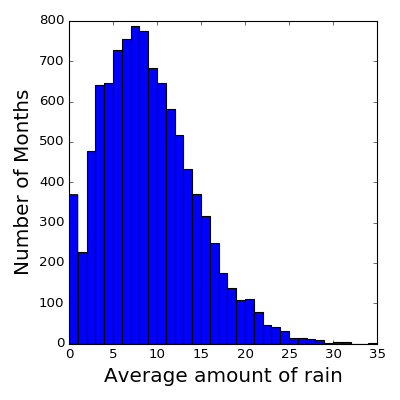

In [40]:
### Your code here?    
plt.figure(figsize=(5,5))

plt.hist(total,bins=35,range=(0,35)) 
# Note that the way we have done this with the range of values, the low edge of a bin represents the side of the die

plt.xlabel("Average amount of rain",fontsize=18)
plt.ylabel("Number of Months",fontsize=18)

plt.tight_layout()

### 3c (10 pts)

What is the average amount of rain to fall in any given month? 



In [41]:
# Your code here?
total.append(sum(amount))
print sum(total)/10000.

8.6143


#### 3d (20)

Once you find the average value, someone might ask you for the uncertainty (some people also refer to uncertainty as the "*error*") on your prediction. That can be tricky to calculate, so often what is given is just a *range* of possible values. "We estimate the rainfall to be between X cm and Y cm." The question is, how to decide what that range is. 

The way this is often done is to find the middle 95% of the trial values (from your Monte Carlo run) and then use the low-edge and the high-edge of that range. If you're concerned about the middle 95%, then 2.5% of the values are below them and 2.5% of all the values are above them. The rainfall values at those edges are what you use for the ranges to quote. 

This is what people mean when they say, "I'm 95% confident that the rainfall will be between X and Y", and when you write it up for the LaTeX document, you should also quote it this way. 

*Hint!* This part becomes much easier if you sort all the values using any of the numpy/Python sort functions you can read about online. When you sort them, you should be able to find what rainfall is at the edge for the lower 2.5% and the higher 2.5%. 

In [49]:
# Your code here
a = np.array([total])
p = np.percentile(a,95)
print p

18.0
